In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('clean_cardio_activities.csv')
data['date'] = pd.to_datetime(data['date'])

In [3]:
data.shape

(426, 8)

In [4]:
data.head()

,date,activity id,type,calories burned,climb (m),duration(s),distance(m),speed(m/s)
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,774.0,130,3520.0,10440.0,2.966667
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,954.0,168,4454.0,12840.0,2.886111
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,967.0,171,4515.0,13010.0,2.880556
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,960.0,169,4454.0,12980.0,2.908333
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,967.0,170,4332.0,13020.0,2.980556


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             426 non-null    datetime64[ns]
 1   activity id      426 non-null    object        
 2   type             426 non-null    object        
 3   calories burned  426 non-null    float64       
 4   climb (m)        426 non-null    int64         
 5   duration(s)      426 non-null    float64       
 6   distance(m)      426 non-null    float64       
 7   speed(m/s)       426 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 26.8+ KB


## prefered exercise

In [6]:
df = data[['type', 'activity id']].groupby('type').count().reset_index().sort_values(by='activity id')
df['log count'] = df['activity id'].apply(np.log)
df.head()

,type,activity id,log count
0,Cycling,22,3.091042
1,Running,404,6.001415


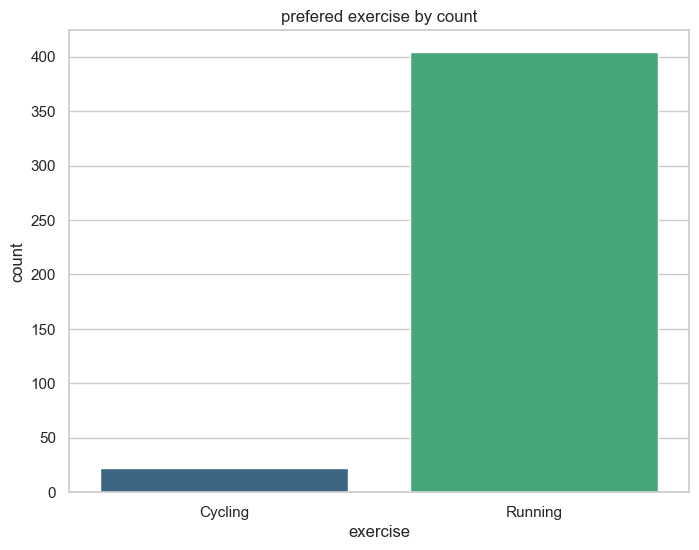

In [7]:

# Create a barplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=df['type'], y=df['activity id'], palette="viridis", hue=df['type'])

# Add labels and title
plt.xlabel('exercise')
plt.ylabel('count')
plt.title('prefered exercise by count');

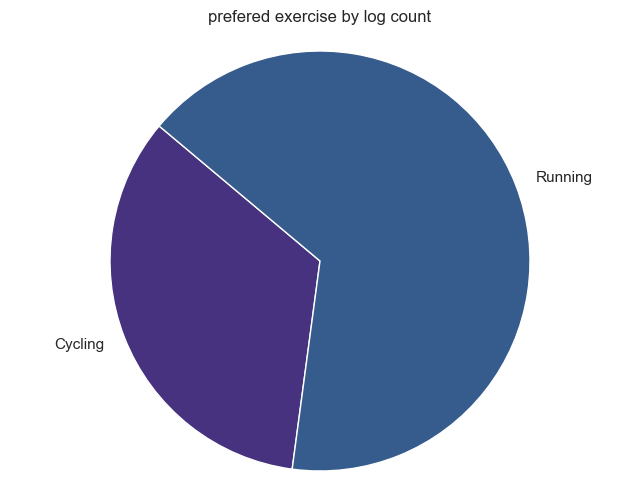

In [8]:
# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(df['log count'], labels=df['type'], startangle=140, colors=sns.color_palette('viridis'))

# Add title
plt.title('prefered exercise by log count')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

In [9]:
df = data[['type', 'calories burned']].groupby('type').mean().reset_index().sort_values(by='calories burned')
df.head()

,type,calories burned
0,Cycling,480.227273
1,Running,713.842335


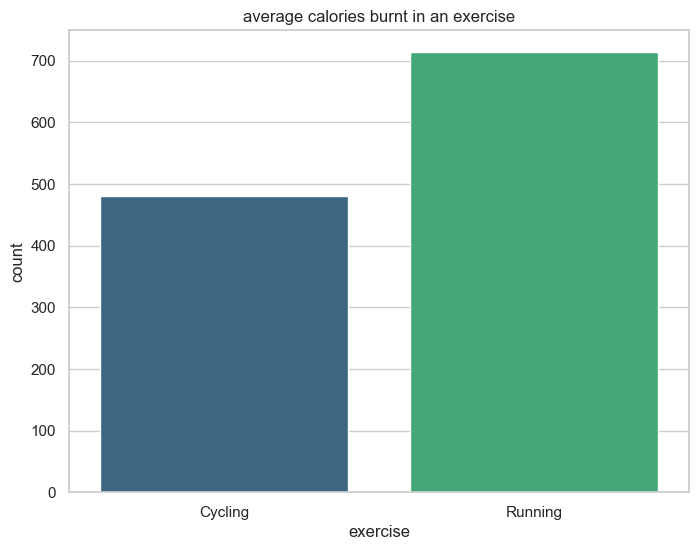

In [10]:

# Create a barplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=df['type'], y=df['calories burned'], palette="viridis", hue=df['type'])

# Add labels and title
plt.xlabel('exercise')
plt.ylabel('count')
plt.title('average calories burnt in an exercise');

## calories burnt in a second

In [11]:
data['calories burned per second'] = data['calories burned']/data['duration(s)']

In [12]:
data.head()

,date,activity id,type,calories burned,climb (m),duration(s),distance(m),speed(m/s),calories burned per second
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,774.0,130,3520.0,10440.0,2.966667,0.219886
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,954.0,168,4454.0,12840.0,2.886111,0.214189
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,967.0,171,4515.0,13010.0,2.880556,0.214175
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,960.0,169,4454.0,12980.0,2.908333,0.215537
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,967.0,170,4332.0,13020.0,2.980556,0.223223


In [13]:
df = df = data[['type', 'calories burned per second', 'duration(s)','distance(m)']].groupby('type').mean().reset_index().sort_values(by='calories burned per second')
df.head()

,type,calories burned per second,duration(s),distance(m)
0,Cycling,0.131822,3703.727273,19692.272727
1,Running,0.215886,3294.314356,10190.618812


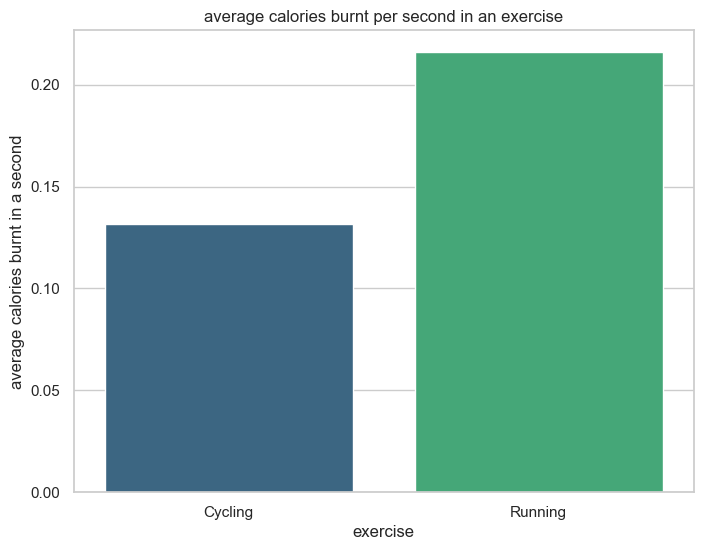

In [14]:
# Create a barplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=df['type'], y=df['calories burned per second'], palette="viridis", hue=df['type'])

# Add labels and title
plt.xlabel('exercise')
plt.ylabel('average calories burnt in a second')
plt.title('average calories burnt per second in an exercise');

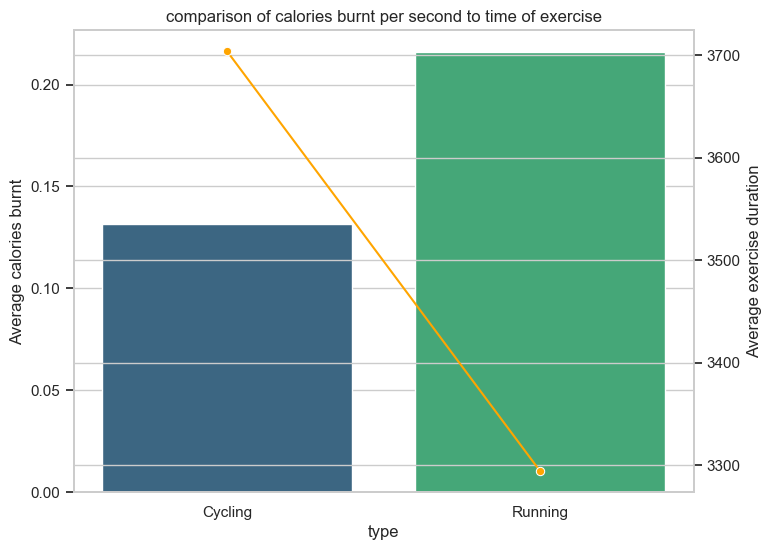

In [15]:

# Create a figure with subplots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create bar plot on primary y-axis (left)
sns.barplot(x=df['type'], y=df['calories burned per second'], ax=ax1, palette="viridis", hue=df['type'])
ax1.set_ylabel('Average calories burnt')

# Create a secondary y-axis (right) for line plot
ax2 = ax1.twinx()
sns.lineplot(x=df['type'], y=df['duration(s)'], ax=ax2, marker='o', color='orange')
ax2.set_ylabel('Average exercise duration')

# Set title
plt.title('comparison of calories burnt per second to time of exercise')

# Show the plot
plt.show();

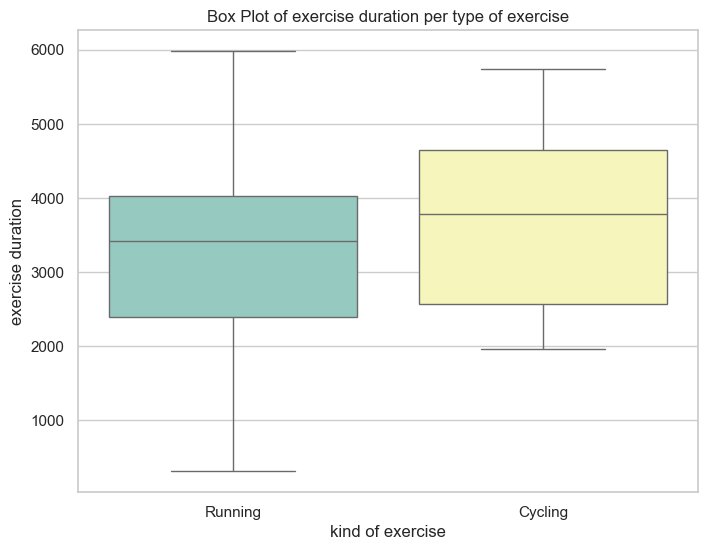

In [16]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="duration(s)", data=data, palette="Set3", hue='type')

# Add labels and title
plt.xlabel('kind of exercise')
plt.ylabel('exercise duration')
plt.title('Box Plot of exercise duration per type of exercise')

# Show the plot
plt.show();

from the boxplot, we can see that duration is not a viable field of analysis of the type of exercise. This is becuase from the dataset people walking took way less time than the rest of exercises.

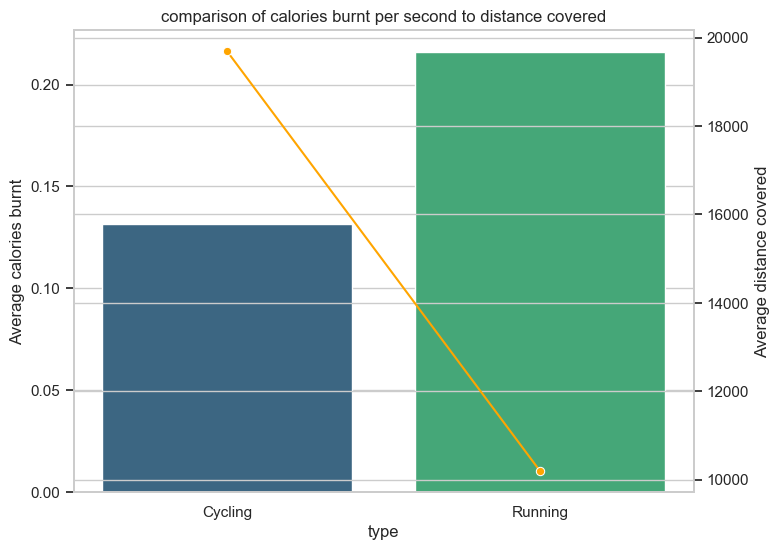

In [17]:
# Create a figure with subplots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create bar plot on primary y-axis (left)
sns.barplot(x=df['type'], y=df['calories burned per second'], ax=ax1, palette="viridis", hue=df['type'])
ax1.set_ylabel('Average calories burnt')

# Create a secondary y-axis (right) for line plot
ax2 = ax1.twinx()
sns.lineplot(x=df['type'], y=df['distance(m)'], ax=ax2, marker='o', color='orange')
ax2.set_ylabel('Average distance covered')

# Set title
plt.title('comparison of calories burnt per second to distance covered')

# Show the plot
plt.show();

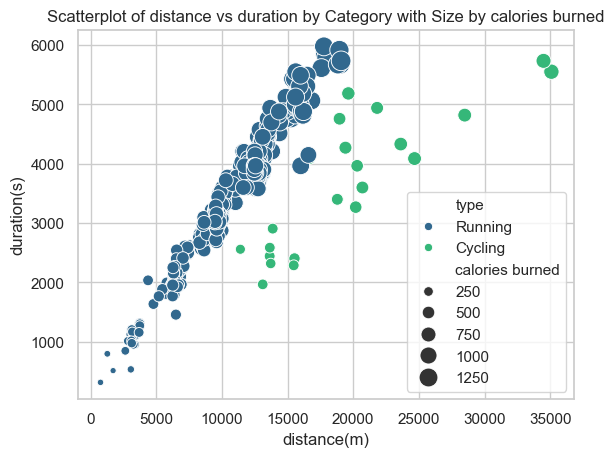

In [18]:
# Creating the scatterplot
sns.scatterplot(data=data, x='distance(m)', y='duration(s)', hue='type', size='calories burned', sizes=(20, 200), palette="viridis")
# Adding title
plt.title('Scatterplot of distance vs duration by Category with Size by calories burned')
# Show plot
plt.show()

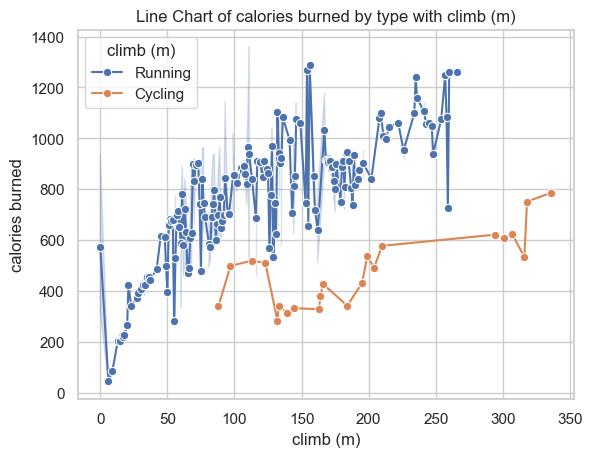

In [19]:
# Creating the line chart
sns.lineplot(data=data, x='climb (m)', y='calories burned', hue='type', marker='o')

# Adding title and labels
plt.title('Line Chart of calories burned by type with climb (m)')
plt.xlabel('climb (m)')
plt.ylabel('calories burned')

# Show plot
plt.legend(title='climb (m)')
plt.show()

## When do people prefer type of exercise

In [20]:
data['day_of_week'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.strftime('%B')
data.head()

,date,activity id,type,calories burned,climb (m),duration(s),distance(m),speed(m/s),calories burned per second,day_of_week,month
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,774.0,130,3520.0,10440.0,2.966667,0.219886,Sunday,November
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,954.0,168,4454.0,12840.0,2.886111,0.214189,Friday,November
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,967.0,171,4515.0,13010.0,2.880556,0.214175,Sunday,November
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,960.0,169,4454.0,12980.0,2.908333,0.215537,Thursday,November
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,967.0,170,4332.0,13020.0,2.980556,0.223223,Saturday,October


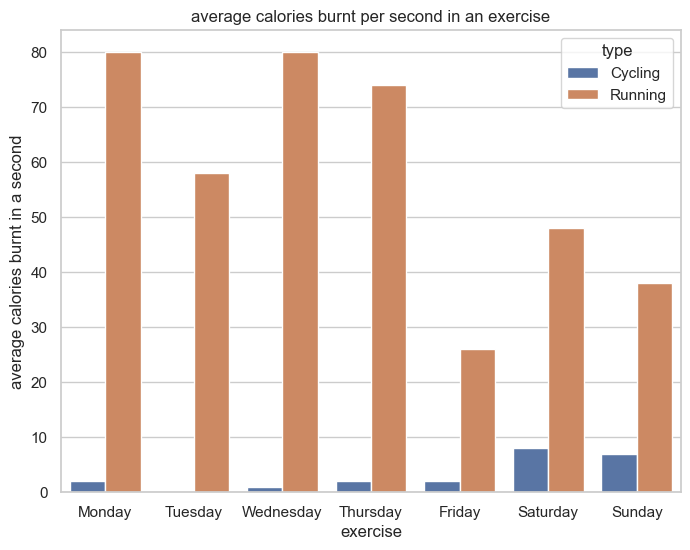

In [21]:
days_of_week_cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df = data[['day_of_week', 'activity id', 'type']].groupby(['day_of_week','type']).count().reset_index()
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_of_week_cats, ordered=True)
# Create a barplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=df['day_of_week'], y=df['activity id'], hue=df['type'])

# Add labels and title
plt.xlabel('exercise')
plt.ylabel('average calories burnt in a second')
plt.title('average calories burnt per second in an exercise');

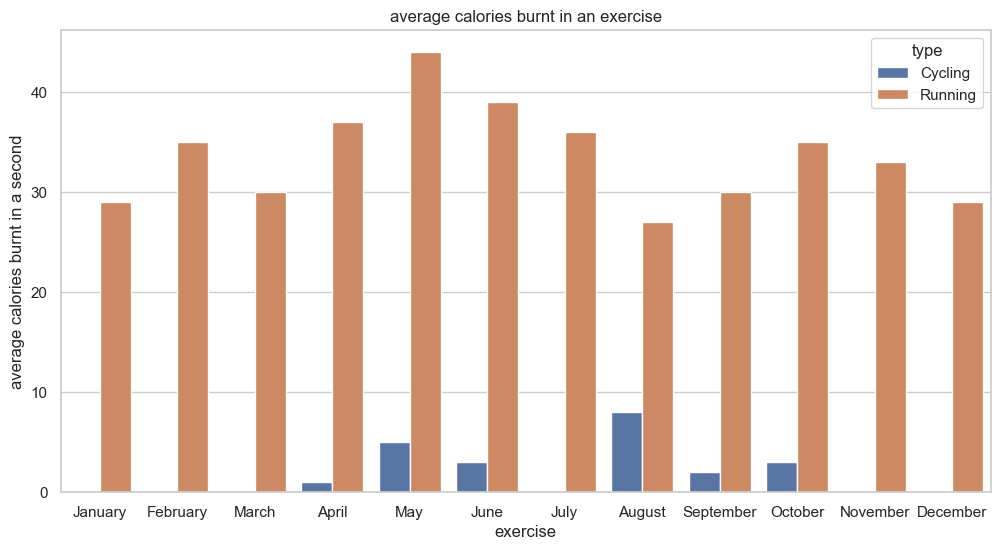

In [22]:
months_cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = data[['month', 'activity id', 'type']].groupby(['month', 'type']).count().reset_index()
df['month'] = pd.Categorical(df['month'], categories=months_cats, ordered=True)
# Create a barplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=df['month'], y=df['activity id'],hue=df['type'])

# Add labels and title
plt.xlabel('exercise')
plt.ylabel('average calories burnt in a second')
plt.title('average calories burnt in an exercise');

# When do they burn most calories

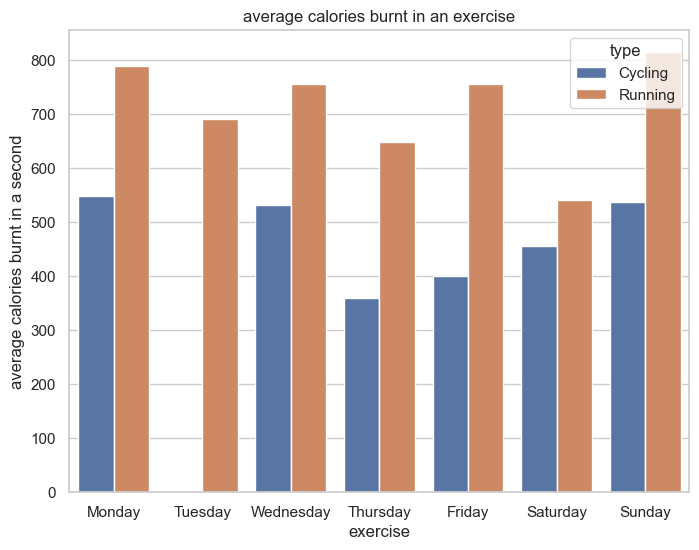

In [23]:
df = data[['day_of_week', 'calories burned', 'type']].groupby(['day_of_week', 'type']).mean().reset_index()
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_of_week_cats, ordered=True)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=df['day_of_week'], y=df['calories burned'], hue=df['type'])

# Add labels and title
plt.xlabel('exercise')
plt.ylabel('average calories burnt in a second')
plt.title('average calories burnt in an exercise');

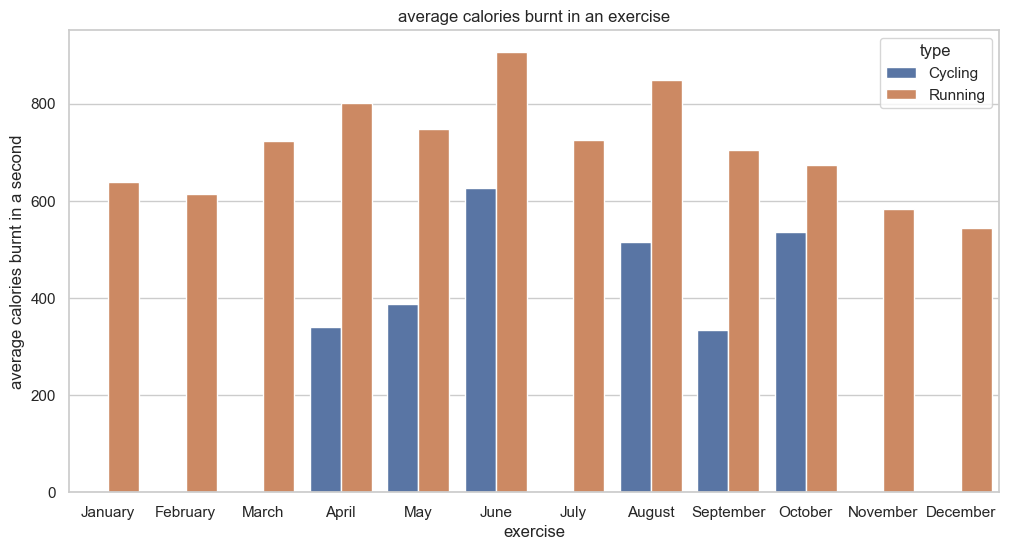

In [24]:
df = data[['calories burned', 'month', 'type']].groupby(['month', 'type']).mean().reset_index()
df['month'] = pd.Categorical(df['month'], categories=months_cats, ordered=True)
# Create a barplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=df['month'], y=df['calories burned'], hue=df['type'])

# Add labels and title
plt.xlabel('exercise')
plt.ylabel('average calories burnt in a second')
plt.title('average calories burnt in an exercise');

In [25]:
data.head()

,date,activity id,type,calories burned,climb (m),duration(s),distance(m),speed(m/s),calories burned per second,day_of_week,month
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,774.0,130,3520.0,10440.0,2.966667,0.219886,Sunday,November
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,954.0,168,4454.0,12840.0,2.886111,0.214189,Friday,November
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,967.0,171,4515.0,13010.0,2.880556,0.214175,Sunday,November
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,960.0,169,4454.0,12980.0,2.908333,0.215537,Thursday,November
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,967.0,170,4332.0,13020.0,2.980556,0.223223,Saturday,October


In [26]:
data.drop(['date', 'activity id'], axis=1).to_csv('clean_ml_data.csv', index=False)